# Pandas Series

O objeto Series do módulo Pandas pode ser visto como um vetor ou matriz rotulada de 1 dimensão.

Para mais informações sobre **Series** do Pandas clique [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/series.html).

O código fonte do objeto Series está disponível no Github. Quem tiver curiosidade pode visualizar clicando [aqui](https://github.com/pandas-dev/pandas/blob/v0.24.2/pandas/core/series.py).

In [1]:
import pandas as pd
import numpy as np

### Criando Series a partir de listas

In [2]:
idades = [68, 23, 17, 39, 25, 58]
idades

[68, 23, 17, 39, 25, 58]

In [3]:
s = pd.Series(idades)
s

0    68
1    23
2    17
3    39
4    25
5    58
dtype: int64

In [4]:
# Como retornar a idade 39?
s[3]

39

In [27]:
s = pd.Series([68, 23, 17, 39, 25, 58])
s

0    68
1    23
2    17
3    39
4    25
5    58
dtype: int64

In [6]:
pessoas = ['Eni', 'Bia', 'Flávio', 'Carlos', 'Dedé', 'Abigail']

In [7]:
s1 = pd.Series(idades, pessoas)
s1

Eni        68
Bia        23
Flávio     17
Carlos     39
Dedé       25
Abigail    58
dtype: int64

In [8]:
# Como retornar a idade 39, agora que a série está rotulada?
s1['Carlos']

39

In [9]:
s2 = pd.Series(index = pessoas, data = idades)
s2

Eni        68
Bia        23
Flávio     17
Carlos     39
Dedé       25
Abigail    58
dtype: int64

### Criando Series a partir de tuplas

In [10]:
# Minas Gerais teve seu nome digitado errado de forma intencional
nomes = ("Mnas Gerais", "Amazonas", "Maranhão", "Goiás", "Santa Catarina")
nomes

('Mnas Gerais', 'Amazonas', 'Maranhão', 'Goiás', 'Santa Catarina')

In [11]:
siglas = ("MG", "AM", "MA", "GO", "SC")
siglas

('MG', 'AM', 'MA', 'GO', 'SC')

In [12]:
estados = pd.Series(nomes, siglas)
estados

MG       Mnas Gerais
AM          Amazonas
MA          Maranhão
GO             Goiás
SC    Santa Catarina
dtype: object

In [13]:
estados["MG"] = "Minas Gerais"
estados

MG      Minas Gerais
AM          Amazonas
MA          Maranhão
GO             Goiás
SC    Santa Catarina
dtype: object

### Criando Series a partir de arrays NumPy

In [3]:
precos = np.array([25, 22, 18.5, 4.75, 3, 4.5, 2.3])
precos

array([25.  , 22.  , 18.5 ,  4.75,  3.  ,  4.5 ,  2.3 ])

In [4]:
type(precos)

numpy.ndarray

In [5]:
lanches = np.array(['X-tudo', 'X-Bacon', 'Bauru', 'Misto-quente', 'Pão-de-queijo', 'Coxinha', 'Pastel'])
lanches

array(['X-tudo', 'X-Bacon', 'Bauru', 'Misto-quente', 'Pão-de-queijo',
       'Coxinha', 'Pastel'], dtype='<U13')

In [6]:
s3 = pd.Series(precos)
s3

0    25.00
1    22.00
2    18.50
3     4.75
4     3.00
5     4.50
6     2.30
dtype: float64

In [7]:
s4 = pd.Series(lanches)
s4

0           X-tudo
1          X-Bacon
2            Bauru
3     Misto-quente
4    Pão-de-queijo
5          Coxinha
6           Pastel
dtype: object

In [8]:
cardapio = pd.Series(precos, lanches)
cardapio

X-tudo           25.00
X-Bacon          22.00
Bauru            18.50
Misto-quente      4.75
Pão-de-queijo     3.00
Coxinha           4.50
Pastel            2.30
dtype: float64

### Criando Series a partir de dicionários

In [54]:
dic_estados = {"MG": "Minas Gerais", "CE": "Ceará", "MT": "Mato Grosso", "RR": "Roraima"}
serie_estados = pd.Series(dic_estados)
serie_estados

MG    Minas Gerais
CE           Ceará
MT     Mato Grosso
RR         Roraima
dtype: object

In [56]:
dic_estados2 = {"MG": {"Estado":"Minas Gerais", "Capital":"Belo Horizonte", "População (2014)":20777672}, 
               "CE": {"Estado":"Ceará", "Capital":"Fortaleza", "População (2014)":8867448},
               "MT": {"Estado":"Mato Grosso", "Capital":"Cuiabá", "População (2014)":3236578},
               "RR": {"Estado":"Roraima", "Capital":"Boa Vista", "População (2014)":500826},}
serie_estados2 = pd.Series(dic_estados2)
serie_estados2

MG    {'Estado': 'Minas Gerais', 'Capital': 'Belo Ho...
CE    {'Estado': 'Ceará', 'Capital': 'Fortaleza', 'P...
MT    {'Estado': 'Mato Grosso', 'Capital': 'Cuiabá',...
RR    {'Estado': 'Roraima', 'Capital': 'Boa Vista', ...
dtype: object

In [24]:
serie_estados2["MT"]

{'Estado': 'Mato Grosso', 'Capital': 'Cuiabá', 'População (2014)': 3236578}

In [31]:
serie_estados2["MG"]["População (2014)"]

20777672

In [25]:
serie_estados2["RR"]["Capital"]

'Boa Vista'

### Criando Series a partir de arquivos .csv

In [41]:
# O arquivo idades.csv contém as idades de 100 pessoas (apenas 1 coluna)
idadescsv = pd.read_csv("idades.csv")
idadescsv.head() # mostra as primeiras linhas de uma Series ou DataFrame

,Idades
0,55
1,45
2,74
3,18
4,21


In [37]:
# É possível acessar o índice 3?
idadescsv[3]

KeyError: 3

In [38]:
type(idadescsv)

pandas.core.frame.DataFrame

In [39]:
# Forma correta de acessar, mas vamos estudar o objeto DataFrame em outra aula
idadescsv['Idades'][3]

18

In [35]:
# Passando o argumento squeeze = True (por default squeeze = False)
# Quando squeeze = True, se os dados estiverem em apenas 1 dimensão, é então retornado uma Series
idadescsv = pd.read_csv("idades.csv", squeeze=True)
idadescsv.head()

C:\Users\Thiago\AppData\Local\Temp\ipykernel_25468\2008701318.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  idadescsv = pd.read_csv("idades.csv", squeeze=True)


0    55
1    45
2    74
3    18
4    21
Name: Idades, dtype: int64

In [45]:
idadescsv[3]

18

In [46]:
type(idadescsv)

pandas.core.series.Series

In [34]:
# O arquivo idades2.csv contém o nomes e idade de 100 pessoas. A coluna nome será usada como índice.
idadescsv2 = pd.read_csv("idades2.csv", squeeze=True)
idadescsv2.head()

C:\Users\Thiago\AppData\Local\Temp\ipykernel_25468\776656115.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  idadescsv2 = pd.read_csv("idades2.csv", squeeze=True)


,Nome,Idade
0,Agatha,24
1,Alice,27
2,Alícia,18
3,Amanda,18
4,Ana Beatriz,44


In [50]:
type(idadescsv2)

pandas.core.frame.DataFrame

In [33]:
idadescsv3 = pd.read_csv("idades2.csv", index_col = 0, squeeze=True)
idadescsv3.head()

C:\Users\Thiago\AppData\Local\Temp\ipykernel_25468\1063410938.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  idadescsv3 = pd.read_csv("idades2.csv", index_col = 0, squeeze=True)


Nome
Agatha         24
Alice          27
Alícia         18
Amanda         18
Ana Beatriz    44
Name: Idade, dtype: int64

In [54]:
idadescsv4 = pd.read_csv("idades2.csv", index_col = 1, squeeze=True)
idadescsv4.head()

C:\Users\Thiago\AppData\Local\Temp\ipykernel_14344\2872763657.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  idadescsv4 = pd.read_csv("idades2.csv", index_col = 1, squeeze=True)


Idade
24         Agatha
27          Alice
18         Alícia
18         Amanda
44    Ana Beatriz
Name: Nome, dtype: object

### Criando Series a partir de planilhas do Excel

In [55]:
idadesxls = pd.read_excel("idades2.xlsx", squeeze=True)
idadesxls.head()
# Abre a primeira planilha

C:\Users\Thiago\AppData\Local\Temp\ipykernel_14344\559075528.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  idadesxls = pd.read_excel("idades2.xlsx", squeeze=True)


0    55
1    45
2    74
3    18
4    21
Name: Idades, dtype: int64

In [56]:
idadesxls2 = pd.read_excel("idades2.xlsx", sheet_name="Planilha2")
idadesxls2.head()

,Nome,Idade
0,Agatha,24
1,Alice,27
2,Alícia,18
3,Amanda,18
4,Ana Beatriz,44


In [57]:
type(idadesxls2)

pandas.core.frame.DataFrame

In [58]:
idadesxls3 = pd.read_excel("idades2.xlsx", sheet_name="Planilha2", index_col = 0, squeeze=True)
idadesxls3.head()

C:\Users\Thiago\AppData\Local\Temp\ipykernel_14344\4228026047.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  idadesxls3 = pd.read_excel("idades2.xlsx", sheet_name="Planilha2", index_col = 0, squeeze=True)


Nome
Agatha         24
Alice          27
Alícia         18
Amanda         18
Ana Beatriz    44
Name: Idade, dtype: int64

In [59]:
type(idadesxls3)

pandas.core.series.Series

### Atributos do objeto Series

| Atributo | Descrição | Exemplo |
|:------------|:-------------------------------------------------------------------------|:--------------|
|[dtype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dtype.html) | Retorna o tipo dos dados armazenados em um objeto Series | `s.dtype`|
|[index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html) | Retorna o índice (rótulos) de um objeto Series | `s.index`|
|[name](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html) | Retorna o nome | `s.name`|
|[nbytes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nbytes.html) | Retorna o tamanho em bytes de um objeto Series | `s.nbytes`|
|[ndim](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.ndim.html) | Retorna o número de dimensões de um objeto Series | `s.ndim`|
|[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.shape.html) | Retorna uma tupla com o formato de um objeto Series | `s.shape`|
|[size](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.size.html) | Retorna a quantidade de elementos de um objeto Series | `s.size`|
|[values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.values.html) | Retorna os elementos de um objeto Series como um *ndarray*| `s.values`|

In [60]:
cardapio.dtype

dtype('float64')

In [61]:
cardapio.index

Index(['X-tudo', 'X-Bacon', 'Bauru', 'Misto-quente', 'Pão-de-queijo',
       'Coxinha', 'Pastel'],
      dtype='object')

In [62]:
s.index

RangeIndex(start=0, stop=6, step=1)

In [63]:
cardapio.name = "Cardápio"

In [64]:
cardapio.name

'Cardápio'

In [65]:
cardapio.nbytes

56

In [66]:
cardapio.ndim

1

In [67]:
cardapio.shape

(7,)

In [68]:
cardapio.size

7

In [69]:
cardapio.values

array([25.  , 22.  , 18.5 ,  4.75,  3.  ,  4.5 ,  2.3 ])

### Métodos do objeto Series: indexação e iteração

| Método | Descrição | Exemplo |
|:------------|:-------------------------------------------------------------------------|:--------------|
|[at()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.at.html) | Acessa o elemento da chave passada por parâmetro | `s.iat["chave"]`|
|[iat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.iat.html) | Acessa o elemento no índice passado por parâmetro | `s.iat(0)`|
|[get()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.get.html#pandas.Series.get) | Retorna um valor para a chave passada por parâmetro | `s.get(2)`|
|[loc()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.loc.html) | Acessa os elementos para as chaves passadas por parâmetro | `s.loc["chave1", "chave2"]`|
|[iloc()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.iloc.html) | Acesso via índice | `s.iloc[0] ou s.iloc[[1,3]]`|
|[keys()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.keys.html) | Retorna o índice (rótulos) de um objeto Series | `s.keys()`|

In [9]:
cardapio

X-tudo           25.00
X-Bacon          22.00
Bauru            18.50
Misto-quente      4.75
Pão-de-queijo     3.00
Coxinha           4.50
Pastel            2.30
dtype: float64

In [11]:
cardapio.at["X-Bacon"]

22.0

In [14]:
cardapio.iat[0]

25.0

In [15]:
cardapio.iat[0] = 25.5

In [16]:
cardapio.get(0)

25.5

In [17]:
cardapio.loc[["Bauru", "Pastel"]]

Bauru     18.5
Pastel     2.3
dtype: float64

In [18]:
cardapio.iloc[[0,2,3]]

X-tudo          25.50
Bauru           18.50
Misto-quente     4.75
dtype: float64

In [19]:
cardapio.keys()

Index(['X-tudo', 'X-Bacon', 'Bauru', 'Misto-quente', 'Pão-de-queijo',
       'Coxinha', 'Pastel'],
      dtype='object')

### Métodos do objetos Series: operações matemáticas e estatísticas

| Método | Descrição | Exemplo |
|:------------|:-------------------------------------------------------------------------|:--------------|
|[add()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.add.html) | Retorna a soma com outra Series ou escalar, elemento por elemento | `c = a.add(b, fill_value=0)`|
|[sub()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sub.html) | Retorna a subtração com outra Series ou escalar, elemento por elemento | `c = a.sub(b, fill_value=3)`|
|[mul()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mul.html) | Retorna a multiplicação com outra Series ou escalar, elemento por elemento | `c = a.mul(b, fill_value=1)`|
|[div()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.div.html) | Retorna a divisão com outra Series ou escalar, elemento por elemento | `c = a.div(b, fill_value=1)`|
|[floordiv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.floordiv.html) | Retorna a divisão inteira com outra Series ou escalar, elemento por elemento | `c = a.floordiv(b, fill_value=1)`|
|[mod()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mod.html) | Retorna o resto da divisão com outra Series ou escalar, elemento por elemento | `c = a.mod(b, fill_value=1)`|
|[pow()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.pow.html) | Retorna a potenciação com outra Series ou escalar, elemento por elemento | `c = a.pow(b, fill_value=1)`|
|[round()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.round.html) | Arredonda os valores de uma Series para uma quantidade determinada de casas decimais | `s = a.round(2)`|
|[lt()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.lt.html) | Retorna o resultado da comparação *menor que*, aplicada elemento por elemento, entre duas Series | `c = a.lt(b, fill_value=0)`|
|[gt()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.gt.html) | Retorna o resultado da comparação *maior que*, aplicada elemento por elemento, entre duas Series | `c = a.gt(b, fill_value=0)`|
|[le()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.le.html) | Retorna o resultado da comparação *menor ou igual*, aplicada elemento por elemento, entre duas Series | `c = a.le(b, fill_value=0)`|
|[ge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.ge.html) | Retorna o resultado da comparação *maior ou igual*, aplicada elemento por elemento, entre duas Series | `c = a.ge(b, fill_value=0)`|
|[ne()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.ne.html) | Retorna o resultado da comparação *não igual a*, aplicada elemento por elemento, entre duas Series | `c = a.ne(b, fill_value=0)`|
|[eq()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.eq.html) | Retorna o resultado da comparação *igual a*, aplicada elemento por elemento, entre duas Series | `c = a.eq(b, fill_value=0)`|
|[product()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.product.html) | Retorna o produto entre todos os elementos de um objeto Series | `s.product()`|
|[sum()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sum.html) | Retorna a soma entre todos os elementos de um objeto Series | `s.sum()`|
|[abs()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.abs.html) | Retorna valor absoluto de todos os elementos de um objeto Series | `s.abs()`|
|[mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mean.html) | Retorna a média aritmética entre todos os elementos de um objeto Series | `s.mean()`|
|[count()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.count.html) | Retorna a quantidade de elementos não nulos | `s.count()`|
|[describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html) | Gera um relatório com diversas medidas estatísticas como média, percentis, etc...  | `s.describe()`|
|[max()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.max.html) | Retorna o maior valor | `s.max()`|
|[min()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.min.html) | Retorna o menor valor | `s.min()`|
|[median()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.median.html) | Retorna a mediana entre todos os elementos | `s.median()`|
|[nlargest()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nlargest.html) | Retorna os *n* maiores elementos | `s.nlargest(3)`|
|[nsmallest()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nsmallest.html) | Retorna os *n* menores elementos | `s.nsmallest(5)`|
|[quantile()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.quantile.html) | Retorna o valor de determinado quantil passado por parâmetro | `s.quantile(0.25)`|
|[std()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.std.html) | Retorna o desvio padrão | `s.std()`|
|[unique()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) | Retorna  valores únicos | `s.unique()`|
|[nunique()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html) | Retorna a quantidade de elementos únicos | `s.nunique()`|

### add(), sub(), mul(), div(), floordiv(), mod() e pow()

In [2]:
a = pd.Series([4, 8, 2, 5, 7])
b = pd.Series([1, 2, 3, 4, 5])
c = a.add(b)
print(" ",a.values)
print("+",b.values)
print("="*16)
print(c.values)

  [4 8 2 5 7]
+ [1 2 3 4 5]
[ 5 10  5  9 12]


In [3]:
a2 = a.add(3)
print(" ",a.values)
print("+",3)
print("="*16)
print(a2.values)

  [4 8 2 5 7]
+ 3
[ 7 11  5  8 10]


In [22]:
d = a.sub(b)
print(" ",a.values)
print("-",b.values)
print("="*16)
print(d.values)

  [4 8 2 5 7]
- [1 2 3 4 5]
[ 3  6 -1  1  2]


In [4]:
dd = a.sub(2)
print(" ",a.values)
print("-",2)
print("="*16)
print(dd.values)

  [4 8 2 5 7]
- 2
[2 6 0 3 5]


In [5]:
e = a.mul(b)
print(" ",a.values)
print("*",b.values)
print("="*16)
print(e.values)

  [4 8 2 5 7]
* [1 2 3 4 5]
[ 4 16  6 20 35]


In [6]:
f = a.div(b)
print(" ",a.values)
print("/",b.values)
print("="*16)
print(f.values)

  [4 8 2 5 7]
/ [1 2 3 4 5]
[4.         4.         0.66666667 1.25       1.4       ]


In [7]:
g = a.floordiv(b)
print("  ",a.values)
print("//",b.values)
print("="*16)
print("  ",g.values)

   [4 8 2 5 7]
// [1 2 3 4 5]
   [4 4 0 1 1]


In [8]:
h = a.mod(b)
print(" ",a.values)
print("%",b.values)
print("="*16)
print(" ",h.values)

  [4 8 2 5 7]
% [1 2 3 4 5]
  [0 0 2 1 2]


In [9]:
i = a.pow(b)
print("  ",a.values)
print("**",b.values)
print("="*16)
print(" ",i.values)

   [4 8 2 5 7]
** [1 2 3 4 5]
  [    4    64     8   625 16807]


In [10]:
j = a.pow(2)
print("  ",a.values)
print("**",2)
print("="*16)
print(" ",j.values)

   [4 8 2 5 7]
** 2
  [16 64  4 25 49]


In [11]:
# usando o parâmetro fill_value
a = pd.Series([4, 3, 5, np.nan, None, 7], index=['a', 'b', 'c', 'd', 'e', 'f'])
a

a    4.0
b    3.0
c    5.0
d    NaN
e    NaN
f    7.0
dtype: float64

In [12]:
b = pd.Series([2, 5, np.nan, np.nan, 3, 6], index=['a', 'b', 'c', 'd', 'e', 'g'])
b

a    2.0
b    5.0
c    NaN
d    NaN
e    3.0
g    6.0
dtype: float64

In [13]:
k = a.div(b, fill_value = 1)
print(" ",a.values)
print("/",b.values)
print("="*16)
print(k.values)

  [ 4.  3.  5. nan nan  7.]
/ [ 2.  5. nan nan  3.  6.]
[2.         0.6        5.                nan 0.33333333 7.
 0.16666667]


### round()

In [14]:
a = pd.Series(np.random.randint(0, 100, 10)).pow(1/2)
a

0    9.539392
1    9.486833
2    8.485281
3    6.324555
4    6.164414
5    6.633250
6    8.544004
7    6.928203
8    7.071068
9    9.055385
dtype: float64

In [15]:
a = a.round(2)
a

0    9.54
1    9.49
2    8.49
3    6.32
4    6.16
5    6.63
6    8.54
7    6.93
8    7.07
9    9.06
dtype: float64

In [16]:
a = a.round(0)
a

0    10.0
1     9.0
2     8.0
3     6.0
4     6.0
5     7.0
6     9.0
7     7.0
8     7.0
9     9.0
dtype: float64

### lt(), gt(), le(), ge(), ne() e eq()

In [17]:
np.random.seed(51)
a = pd.Series(np.random.randint(0, 10, 5))
a

0    9
1    5
2    0
3    9
4    5
dtype: int32

In [18]:
b = pd.Series(np.random.randint(0, 10, 5))
b

0    0
1    5
2    4
3    9
4    5
dtype: int32

In [19]:
a.lt(b)

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [20]:
print(" ",a.values)
print("<",b.values)
print("="*32)
print(a.lt(b).values)

  [9 5 0 9 5]
< [0 5 4 9 5]
[False False  True False False]


In [21]:
print(" ",a.values)
print(">",b.values)
print("="*32)
print(a.gt(b).values)

  [9 5 0 9 5]
> [0 5 4 9 5]
[ True False False False False]


In [22]:
print("  ",a.values)
print("<=",b.values)
print("="*32)
print(a.le(b).values)

   [9 5 0 9 5]
<= [0 5 4 9 5]
[False  True  True  True  True]


In [23]:
print("  ",a.values)
print(">=",b.values)
print("="*32)
print(a.ge(b).values)

   [9 5 0 9 5]
>= [0 5 4 9 5]
[ True  True False  True  True]


In [24]:
print("  ",a.values)
print("!=",b.values)
print("="*32)
print(a.ne(b).values)

   [9 5 0 9 5]
!= [0 5 4 9 5]
[ True False  True False False]


In [25]:
print("  ",a.values)
print("==",b.values)
print("="*32)
print(a.eq(b).values)

   [9 5 0 9 5]
== [0 5 4 9 5]
[False  True False  True  True]


### sum(), product(), abs()

In [28]:
s

0    68
1    23
2    17
3    39
4    25
5    58
dtype: int64

In [29]:
s.sum()

230

In [30]:
s.product()

1503551400

In [31]:
posneg = pd.Series(np.arange(-6,6,2))
posneg

0   -6
1   -4
2   -2
3    0
4    2
5    4
dtype: int32

In [32]:
posneg.abs()

0    6
1    4
2    2
3    0
4    2
5    4
dtype: int32

### Métodos estatísticos

In [36]:
idadescsv3.describe()

count    100.000000
mean      35.570000
std       10.766817
min       18.000000
25%       26.750000
50%       34.000000
75%       45.250000
max       55.000000
Name: Idade, dtype: float64

In [37]:
idadescsv3.mean()

35.57

In [38]:
idadescsv3.std()

10.766816773510332

In [39]:
idadescsv3.median()

34.0

In [40]:
idadescsv3.min()

18

In [41]:
idadescsv3.max()

55

In [42]:
idadescsv3.quantile(0.25)

26.75

In [43]:
idadescsv3.quantile(.5)

34.0

In [44]:
idadescsv3.quantile(.75)

45.25

In [45]:
idadescsv3.nlargest(3)

Nome
Lucas        55
Valentina    54
Lucca        53
Name: Idade, dtype: int64

In [46]:
idadescsv3.nsmallest(3)

Nome
Alícia      18
Amanda      18
Bernardo    18
Name: Idade, dtype: int64

In [47]:
idadescsv3.unique()

array([24, 27, 18, 44, 46, 49, 47, 41, 19, 25, 31, 42, 23, 39, 21, 33, 45,
       34, 43, 29, 36, 40, 32, 22, 48, 52, 51, 55, 53, 26, 54],
      dtype=int64)

In [48]:
# Usando np.sort para ordenar o array de elementos únicos
np.sort(idadescsv3.unique())

array([18, 19, 21, 22, 23, 24, 25, 26, 27, 29, 31, 32, 33, 34, 36, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55],
      dtype=int64)

In [49]:
idadescsv3.nunique()

31

In [50]:
idadescsv3.count()

100

In [51]:
b = pd.Series([2, 5, np.nan, 0, 3, None, 6])
b.values

array([ 2.,  5., nan,  0.,  3., nan,  6.])

In [52]:
b.count()

5

### Métodos do objetos Series: manipulação e seleção

| Método | Descrição | Exemplo |
|:------------|:-------------------------------------------------------------------------|:--------------|
|[copy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.copy.html#pandas.Series.copy) | Retorna uma cópia de um objetos Series | `s.copy()`|
|[append()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.append.html) | Concatena duas ou mais Series | `s = a.append(b)`|
|[replace()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html) | Substitui valor da Series por outro passado por parâmetro | `s = a.replace(-1, 0)`|
|[update()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.update.html) | Modifica uma série por valores de outra série passada por parâmetro | `a.update(b)`|
|[head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.head.html) | Retorna as *n* primeiras linhas | `s.head(3)`|
|[tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.tail.html) | Retorna as *n* últimas linhas | `s.tail(4)`|
|[sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sample.html) | Retorna uma amostra | `s.sample()`|
|[where()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.where.html) | Retorna uma Series onde valores para os quais a condição é **False** são substituídos por outro passado por parâmetro | `s.where(s <= 0, 5)`|
|[mask()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mask.html) | Retorna uma Series onde valores para os quais a condição é **True** são substituídos por outro passado por parâmetro | `s.mask(s > 0, 5)`|

#### copy()

In [57]:
serie_estados2

MG    {'Estado': 'Minas Gerais', 'Capital': 'Belo Ho...
CE    {'Estado': 'Ceará', 'Capital': 'Fortaleza', 'P...
MT    {'Estado': 'Mato Grosso', 'Capital': 'Cuiabá',...
RR    {'Estado': 'Roraima', 'Capital': 'Boa Vista', ...
dtype: object

In [58]:
# Shallow copy
copia = serie_estados2.copy()
copia

MG    {'Estado': 'Minas Gerais', 'Capital': 'Belo Ho...
CE    {'Estado': 'Ceará', 'Capital': 'Fortaleza', 'P...
MT    {'Estado': 'Mato Grosso', 'Capital': 'Cuiabá',...
RR    {'Estado': 'Roraima', 'Capital': 'Boa Vista', ...
dtype: object

In [59]:
copia["MT"]["Capital"] = "CGB"
copia

MG    {'Estado': 'Minas Gerais', 'Capital': 'Belo Ho...
CE    {'Estado': 'Ceará', 'Capital': 'Fortaleza', 'P...
MT    {'Estado': 'Mato Grosso', 'Capital': 'CGB', 'P...
RR    {'Estado': 'Roraima', 'Capital': 'Boa Vista', ...
dtype: object

In [60]:
serie_estados2

MG    {'Estado': 'Minas Gerais', 'Capital': 'Belo Ho...
CE    {'Estado': 'Ceará', 'Capital': 'Fortaleza', 'P...
MT    {'Estado': 'Mato Grosso', 'Capital': 'CGB', 'P...
RR    {'Estado': 'Roraima', 'Capital': 'Boa Vista', ...
dtype: object

In [61]:
# Retornando ao valor original
serie_estados2["MT"]["Capital"] = "Cuiabá"
serie_estados2

MG    {'Estado': 'Minas Gerais', 'Capital': 'Belo Ho...
CE    {'Estado': 'Ceará', 'Capital': 'Fortaleza', 'P...
MT    {'Estado': 'Mato Grosso', 'Capital': 'Cuiabá',...
RR    {'Estado': 'Roraima', 'Capital': 'Boa Vista', ...
dtype: object

In [62]:
# Deep copy
import pickle
copia = pickle.loads(pickle.dumps(serie_estados2))

In [63]:
copia["MT"]["Capital"] = "CGB"
copia

MG    {'Estado': 'Minas Gerais', 'Capital': 'Belo Ho...
CE    {'Estado': 'Ceará', 'Capital': 'Fortaleza', 'P...
MT    {'Estado': 'Mato Grosso', 'Capital': 'CGB', 'P...
RR    {'Estado': 'Roraima', 'Capital': 'Boa Vista', ...
dtype: object

In [65]:
serie_estados2

MG    {'Estado': 'Minas Gerais', 'Capital': 'Belo Ho...
CE    {'Estado': 'Ceará', 'Capital': 'Fortaleza', 'P...
MT    {'Estado': 'Mato Grosso', 'Capital': 'Cuiabá',...
RR    {'Estado': 'Roraima', 'Capital': 'Boa Vista', ...
dtype: object

#### append()

In [66]:
a

0    9
1    5
2    0
3    9
4    5
dtype: int32

In [67]:
b

0    2.0
1    5.0
2    NaN
3    0.0
4    3.0
5    NaN
6    6.0
dtype: float64

In [68]:
ab = a.append(b)
ab

C:\Users\Thiago\AppData\Local\Temp\ipykernel_25468\439259007.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ab = a.append(b)


0    9.0
1    5.0
2    0.0
3    9.0
4    5.0
0    2.0
1    5.0
2    NaN
3    0.0
4    3.0
5    NaN
6    6.0
dtype: float64

In [69]:
ab = a.append(b, ignore_index=True)
ab

C:\Users\Thiago\AppData\Local\Temp\ipykernel_25468\4179930229.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ab = a.append(b, ignore_index=True)


0     9.0
1     5.0
2     0.0
3     9.0
4     5.0
5     2.0
6     5.0
7     NaN
8     0.0
9     3.0
10    NaN
11    6.0
dtype: float64

#### replace()

In [70]:
c = ab.replace(0, 1)
c

0     9.0
1     5.0
2     1.0
3     9.0
4     5.0
5     2.0
6     5.0
7     NaN
8     1.0
9     3.0
10    NaN
11    6.0
dtype: float64


#### update()

In [71]:
d = pd.Series([4, 10, 11, 12], index=[9, 7, 10, 4])
d

9      4
7     10
10    11
4     12
dtype: int64

In [72]:
c.update(d)
c

0      9.0
1      5.0
2      1.0
3      9.0
4     12.0
5      2.0
6      5.0
7     10.0
8      1.0
9      4.0
10    11.0
11     6.0
dtype: float64

#### head()

In [73]:
idadescsv3.head() # Por default retornar as 5 primeiras linhas

Nome
Agatha         24
Alice          27
Alícia         18
Amanda         18
Ana Beatriz    44
Name: Idade, dtype: int64

In [74]:
idadescsv3.head(8)

Nome
Agatha         24
Alice          27
Alícia         18
Amanda         18
Ana Beatriz    44
Ana Clara      46
Ana Julia      49
Ana Luiza      47
Name: Idade, dtype: int64

#### tail()

In [75]:
idadescsv3.tail() # Por default retornar as 5 últimas linhas

Nome
Valentina    54
Vinicius     32
Vitor        41
Vitória      49
Yasmin       52
Name: Idade, dtype: int64

In [76]:
idadescsv3.tail(3)

Nome
Vitor      41
Vitória    49
Yasmin     52
Name: Idade, dtype: int64

#### sample()

In [77]:
idadescsv3.sample() # Por default retorna 1 linha de amostra

Nome
Clara    25
Name: Idade, dtype: int64

In [78]:
idadescsv3.sample(5)

Nome
Maria Fernanda    18
Ian               48
Thiago            47
Ana Luiza         47
Agatha            24
Name: Idade, dtype: int64

#### where()

In [80]:
c = a.append(b,ignore_index=True).replace(np.nan, -1)
c

C:\Users\Thiago\AppData\Local\Temp\ipykernel_25468\4061776052.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  c = a.append(b,ignore_index=True).replace(np.nan, -1)


0     9.0
1     5.0
2     0.0
3     9.0
4     5.0
5     2.0
6     5.0
7    -1.0
8     0.0
9     3.0
10   -1.0
11    6.0
dtype: float64

In [81]:
d = c.where(c > 3, 10) # Troca valores por 10 se a condição for falsa
e = c.where(c <= 3, 0) # Troca valores por 0 se a condição for falsa
print("c.values", c.values)
print("d.values", d.values)
print("e.values", e.values)

c.values [ 9.  5.  0.  9.  5.  2.  5. -1.  0.  3. -1.  6.]
d.values [ 9.  5. 10.  9.  5. 10.  5. 10. 10. 10. 10.  6.]
e.values [ 0.  0.  0.  0.  0.  2.  0. -1.  0.  3. -1.  0.]


#### mask()

In [82]:
d = c.mask(c > 3, 10) # Troca valores por 10 se a condição for verdadeira
e = c.mask(c <= 3, 0) # Troca valores por 0 se a condição for verdadeira
print("c.values", c.values)
print("d.values", d.values)
print("e.values", e.values)

c.values [ 9.  5.  0.  9.  5.  2.  5. -1.  0.  3. -1.  6.]
d.values [10. 10.  0. 10. 10.  2. 10. -1.  0.  3. -1. 10.]
e.values [9. 5. 0. 9. 5. 0. 5. 0. 0. 0. 0. 6.]


### Métodos do objetos Series: manipulação de dados ausentes

| Método | Descrição | Exemplo |
|:------------|:-------------------------------------------------------------------------|:--------------|
|[isna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isna.html) | Retorna quais valores estão ausentes | `s.isna()`|
|[notna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.notna.html) | Retorna quais valores estão presentes | `s.notna()`|
|[dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dropna.html) | Retorna uma nova Series com valores ausentes removidos | `s.dropna()`|
|[fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html) | Substitui valores ausentes por um valor ou usando um método de substituição  | `s.fillna(0)`|

In [83]:
s = pd.Series([2, 5, np.nan, 0, 3, None, 6])
s.isna()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
dtype: bool

In [84]:
s.notna()

0     True
1     True
2    False
3     True
4     True
5    False
6     True
dtype: bool

In [85]:
s1 = s.dropna()
s1

0    2.0
1    5.0
3    0.0
4    3.0
6    6.0
dtype: float64

In [86]:
s.dropna(inplace=True)
s

0    2.0
1    5.0
3    0.0
4    3.0
6    6.0
dtype: float64

In [87]:
s = pd.Series([2, 5, np.nan, 0, 3, None, 6])
s1 = s.fillna(-1)
print(s.values)
print(s1.values)

[ 2.  5. nan  0.  3. nan  6.]
[ 2.  5. -1.  0.  3. -1.  6.]


In [88]:
# Preenche com o elemento posterior ao NaN
s2 = s.fillna(method='bfill')
print(s.values)
print(s2.values)

[ 2.  5. nan  0.  3. nan  6.]
[2. 5. 0. 0. 3. 6. 6.]


In [89]:
# Preenche com o elemento anterior ao NaN
s3 = s.fillna(method='ffill')
print(s.values)
print(s3.values)

[ 2.  5. nan  0.  3. nan  6.]
[2. 5. 5. 0. 3. 3. 6.]


In [90]:
s.fillna(-1, inplace=True)
s

0    2.0
1    5.0
2   -1.0
3    0.0
4    3.0
5   -1.0
6    6.0
dtype: float64

### Métodos do objetos Series: ordenação

| Método | Descrição | Exemplo |
|:------------|:-------------------------------------------------------------------------|:--------------|
|[sort_values()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html) | Retorna uma Series ordenada pelos valores | `s.sort_values()`|
|[sort_index()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_index.html) | Retorna uma Series ordenada pelos rótulos | `s.sort_index()`|

In [91]:
idadescsv3.head()

Nome
Agatha         24
Alice          27
Alícia         18
Amanda         18
Ana Beatriz    44
Name: Idade, dtype: int64

In [93]:
ordenado_id = idadescsv3.sort_values()
ordenado_id.head(15)

Nome
Bernardo          18
Alícia            18
Amanda            18
Heloísa           18
Maria Fernanda    18
Benjamin          19
Rodrigo           19
Daniel            19
Cecília           21
Julia             21
Catarina          21
Henrique          22
Joaquim           22
Manuela           23
Esther            23
Name: Idade, dtype: int64

In [94]:
idadescsv3.head()

Nome
Agatha         24
Alice          27
Alícia         18
Amanda         18
Ana Beatriz    44
Name: Idade, dtype: int64

In [96]:
ordenado_nome = ordenado_id.sort_index()
ordenado_nome.head(15)

Nome
Agatha         24
Alice          27
Alícia         18
Amanda         18
Ana Beatriz    44
Ana Clara      46
Ana Julia      49
Ana Luiza      47
Antônio        47
Arthur         41
Beatriz        27
Benjamin       19
Bernardo       18
Bianca         25
Bruno          31
Name: Idade, dtype: int64

In [97]:
ordenado_id.head()

Nome
Bernardo          18
Alícia            18
Amanda            18
Heloísa           18
Maria Fernanda    18
Name: Idade, dtype: int64

### Métodos do objetos Series: manipulando strings

| Método | Descrição | Exemplo |
|:------------|:-------------------------------------------------------------------------|:--------------|
|[str.capitalize()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.capitalize.html) | Retorna uma Series com os Strings convertidos para a forma *capitalizada*: primeiro caractere maiúsculo e caracteres restantes em minúsculo | `s.str.capitalize()`|
|[str.lower()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html) | Retorna uma Series com os Strings convertidos  para letras minúsculas | `s.str.lower()`|
|[str.upper()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.upper.html) | Retorna uma Series com os Strings convertidos para letras maiúsculas | `s.str.upper() `|
|[str.title()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.title.html) | Retorna uma Series com os Strings convertidos para o formato de título: primeira letra de cada palavra convertida para maiúscula | `s.str.title() `|

In [98]:
livros = pd.Series(["Introdução à programação com Python",
                    "Curso Intensivo de Python",
                    "Python para análise de dados"])
livros

0    Introdução à programação com Python
1              Curso Intensivo de Python
2           Python para análise de dados
dtype: object

In [99]:
livros.str.lower()

0    introdução à programação com python
1              curso intensivo de python
2           python para análise de dados
dtype: object

In [100]:
livros.str.upper()

0    INTRODUÇÃO À PROGRAMAÇÃO COM PYTHON
1              CURSO INTENSIVO DE PYTHON
2           PYTHON PARA ANÁLISE DE DADOS
dtype: object

In [101]:
livros.str.capitalize()

0    Introdução à programação com python
1              Curso intensivo de python
2           Python para análise de dados
dtype: object

In [102]:
livros.str.title()

0    Introdução À Programação Com Python
1              Curso Intensivo De Python
2           Python Para Análise De Dados
dtype: object

In [103]:
livros

0    Introdução à programação com Python
1              Curso Intensivo de Python
2           Python para análise de dados
dtype: object

### Métodos do objetos Series: plotando gráficos

| Método | Descrição | Exemplo |
|:------------|:-------------------------------------------------------------------------|:--------------|
|[plot.area()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.area.html) | Plota o gráfico de área | `s.plot.area()`|
|[plot.bar()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.bar.html) | Plota o gráfico de barras | `s.plot.bar()`|
|[plot.box()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.box.html) | Plota o Boxplot | `s.plot.box()`|
|[plot.hist()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html) | Plota o histograma | `s.plot.hist()`|
|[plot.line()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.line.html) | Plota o gráfico de linhas | `s.plot.line()`|

In [104]:
# Gera uma série com 30 notas aleatórios entre 0 e 100
np.random.seed(50)
notas = pd.Series(np.random.randint(0,101, 30))
notas.head()

0    48
1    96
2    11
3    33
4    94
dtype: int32

In [105]:
notas.describe()

count    30.000000
mean     48.833333
std      32.652912
min       2.000000
25%      20.500000
50%      45.500000
75%      76.250000
max      96.000000
dtype: float64

<AxesSubplot:ylabel='Frequency'>

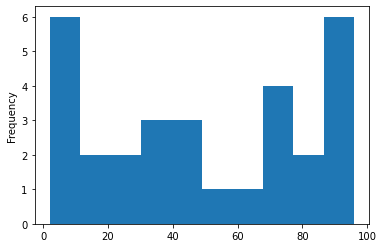

In [106]:
%matplotlib inline
notas.plot.hist()

<AxesSubplot:ylabel='Frequency'>

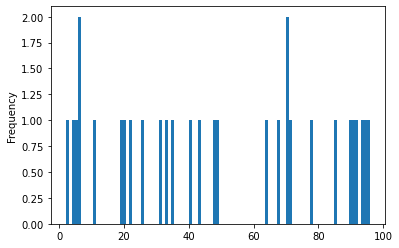

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

In [132]:
notas.plot.hist(bins=101)

In [112]:
np.sort(notas)

array([ 2,  4,  5,  6,  6, 11, 19, 20, 22, 26, 31, 33, 35, 41, 43, 48, 49,
       64, 68, 70, 70, 71, 78, 85, 90, 91, 92, 94, 95, 96])

In [113]:
notas.nunique()

28

<AxesSubplot:>

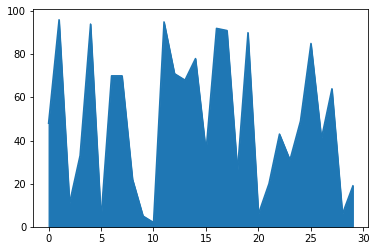

In [114]:
notas.plot.area()

<AxesSubplot:>

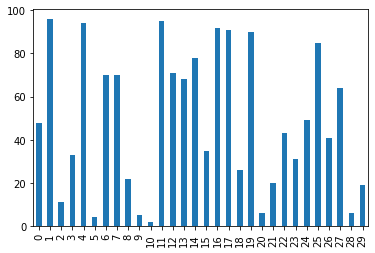

In [126]:
notas.plot.bar()

<AxesSubplot:>

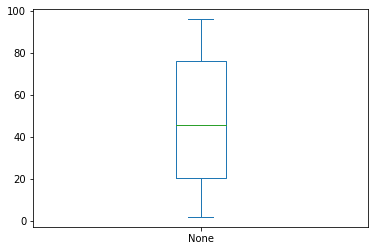

In [127]:
notas.plot.box()

In [128]:
print(notas.min(), notas.quantile(.25), notas.quantile(.5), notas.quantile(.75), notas.max())

2 20.5 45.5 76.25 96


<AxesSubplot:>

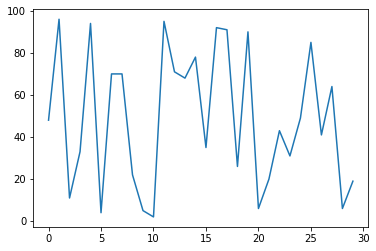

In [129]:
notas.plot.line()

<AxesSubplot:>

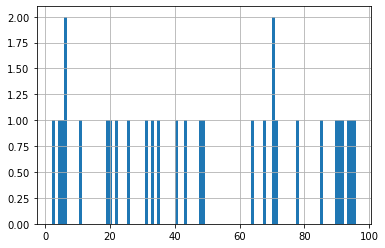

In [131]:
notas.hist(bins=101)